
<center>

# **EDA** 
by: Ly Nguyen

<center>

The purpose of this EDA work is to assess data quality, data distribution, and assess the 'size' of the Delay Type buckets that make sense. 

In [6]:
# Import necessary libraries for this notebook: 

# Read from SQLite database and load to a pandas dataframe
import os
import sqlite3
import pandas as pd

# For using arrays 
import numpy as np

# For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic




In [7]:
# Load the saved df_cleaned parquet file: 
relative_path = os.path.join("..", "data", "df_EDA.parquet")
df = pd.read_parquet(relative_path)

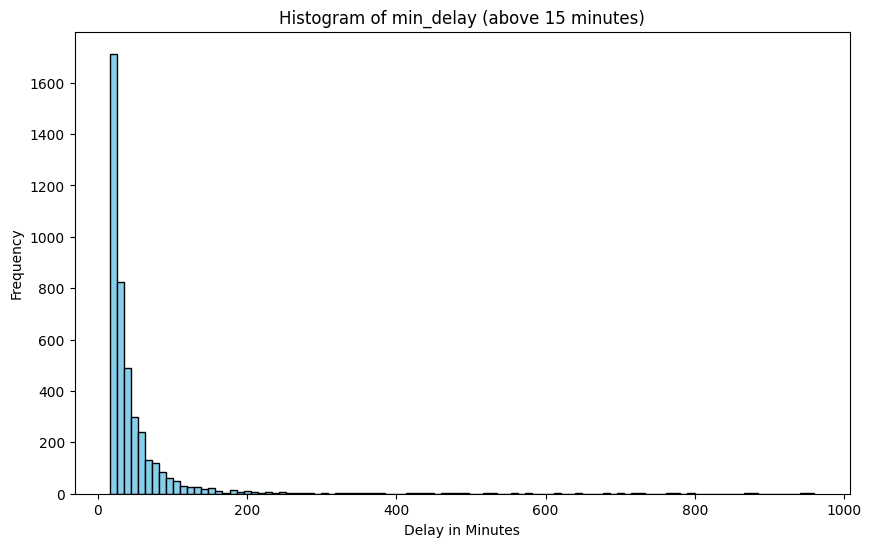

In [8]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_16_plus = df[df['min_delay'] >= 16]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_16_plus['min_delay'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (above 15 minutes)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()


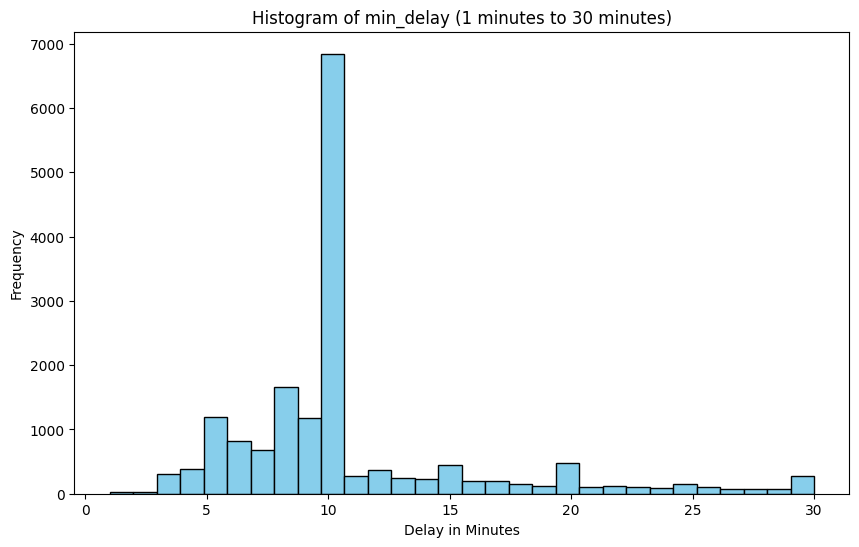

In [9]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_1_to_30 = df[(df['min_delay'] >= 1) & (df['min_delay'] <= 30)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_1_to_30['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (1 minutes to 30 minutes)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

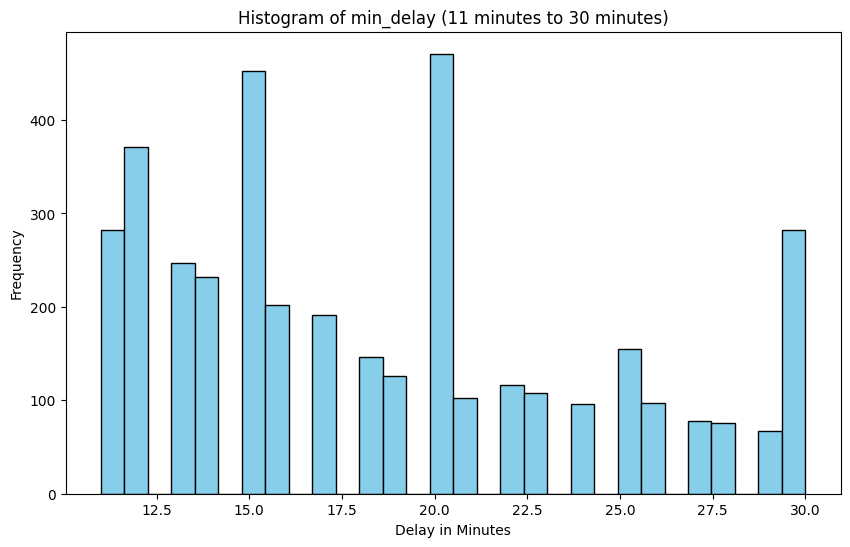

In [10]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_11_to_30 = df[(df['min_delay'] >= 11) & (df['min_delay'] <= 30)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_11_to_30['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (11 minutes to 30 minutes)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

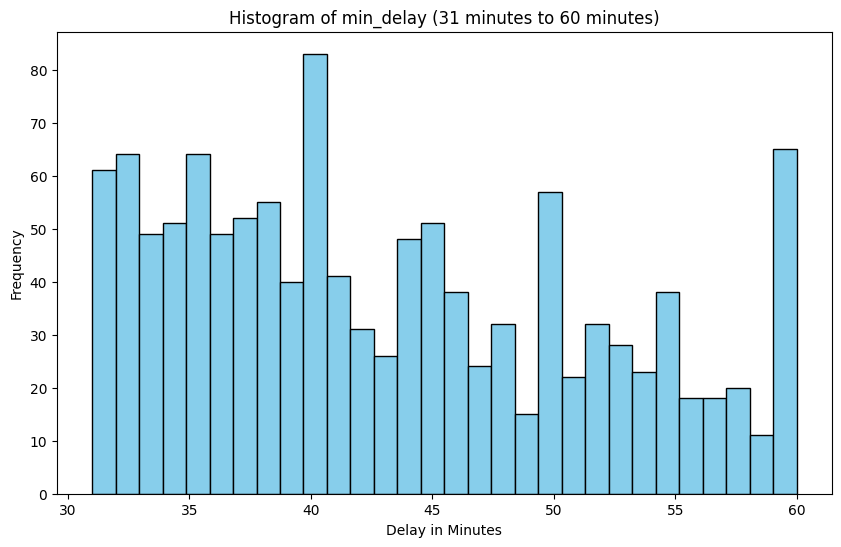

In [11]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_31_to_60 = df[(df['min_delay'] >= 31) & (df['min_delay'] <= 60)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_31_to_60['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (31 minutes to 60 minutes)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

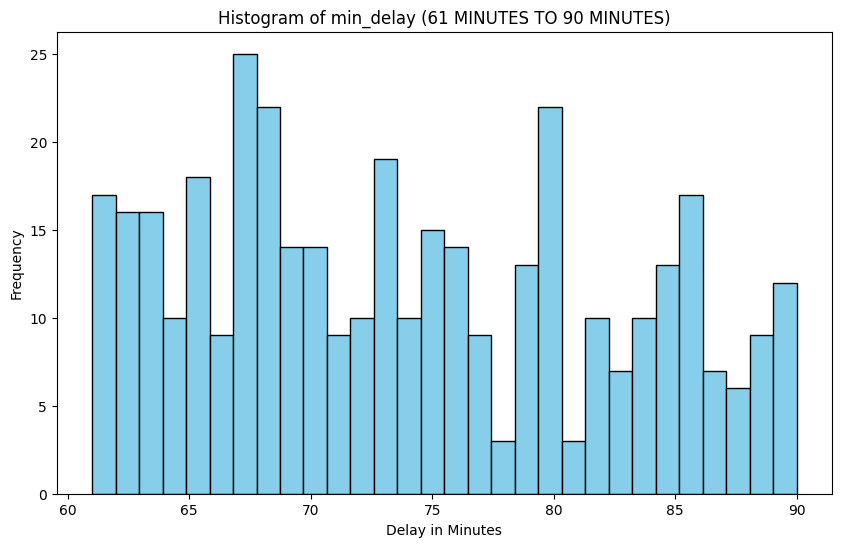

In [12]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_61_to_90 = df[(df['min_delay'] >= 61) & (df['min_delay'] <= 90)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_61_to_90['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (61 MINUTES TO 90 MINUTES)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

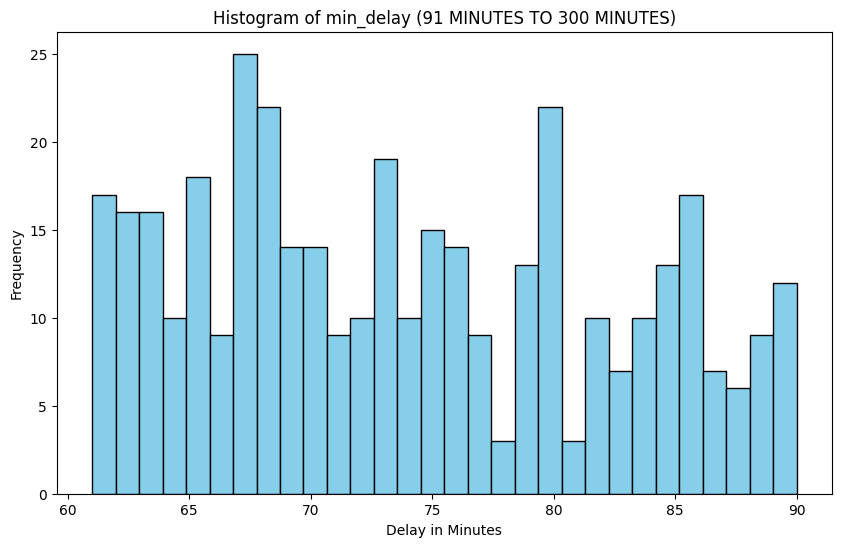

In [13]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_91_to_300 = df[(df['min_delay'] >= 91) & (df['min_delay'] <= 300)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_61_to_90['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (91 MINUTES TO 300 MINUTES)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Define the bins and labels for the categories
bins = [0, 5, 10, 15, 20, 30, 60, float('inf')]
labels = ['<= 5 minutes', '6 - 10 minutes', '11 - 15 minutes', '16 - 20 minutes', '21 - 30 minutes', '31 - 60 minutes', '>= 61 minutes']

# Create a new column 'delay_category' to categorize 'min_delay' based on the specified bins
df['delay_category'] = pd.cut(df['min_delay'], bins=bins, labels=labels, right=True)

# Count the occurrences for each category
bucket_counts = df['delay_category'].value_counts().sort_index()

# Display the counts for each bucket
print(bucket_counts)

delay_category
<= 5 minutes        1944
6 - 10 minutes     11186
11 - 15 minutes     1585
16 - 20 minutes     1136
21 - 30 minutes     1177
31 - 60 minutes     1206
>= 61 minutes        751
Name: count, dtype: int64


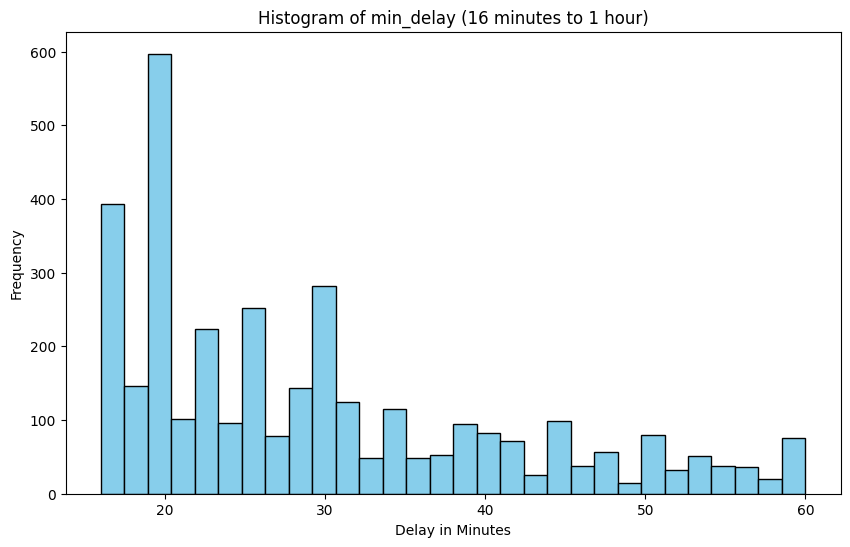

In [15]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_16_to_60 = df[(df['min_delay'] >= 16) & (df['min_delay'] <= 60)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_16_to_60['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (16 minutes to 1 hour)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

*Observation:*

- Frequency drops from about 600 instances for 20-minute delays, to less than 300 instances for 30-minute delays, to about 100 instances for each of 40-minute delays, 50-minute delays, and 60 minute delays. 

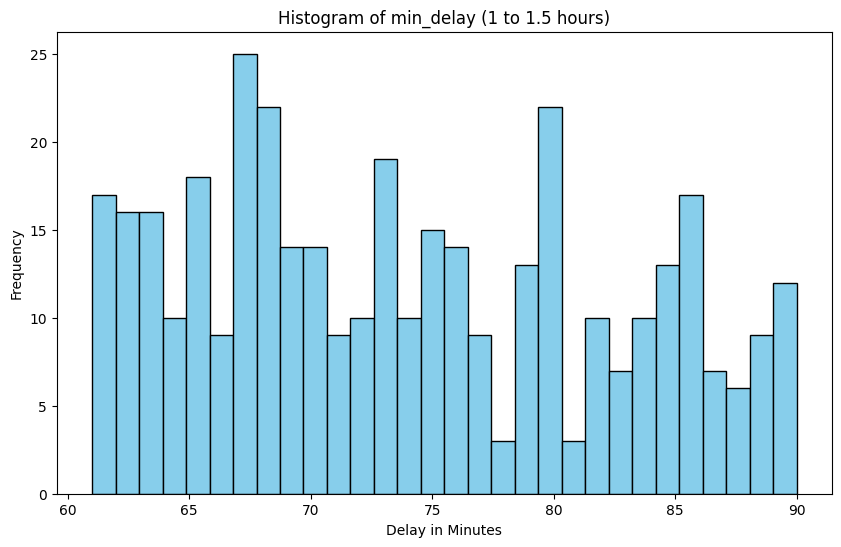

In [16]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_61_to_90 = df[(df['min_delay'] >= 61) & (df['min_delay'] <= 90)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_61_to_90['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (1 to 1.5 hours)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

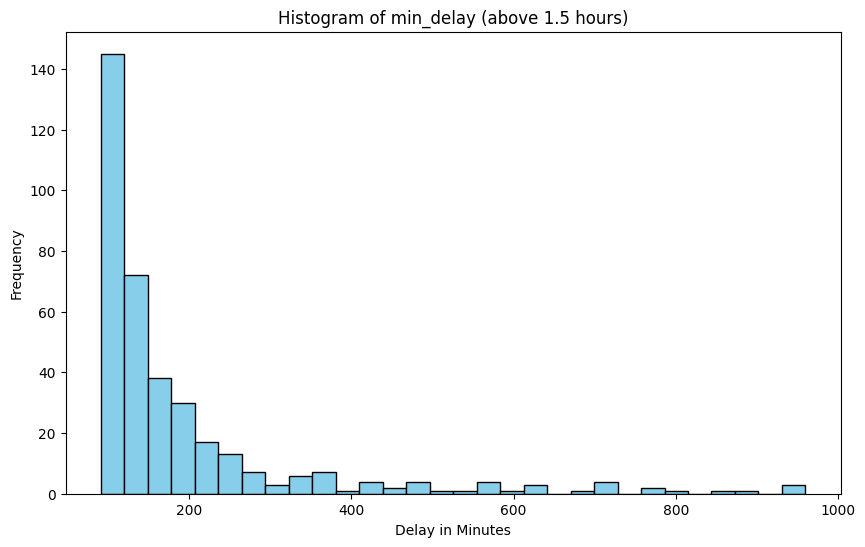

In [17]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_above_90 = df[(df['min_delay'] >= 91)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_above_90['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (above 1.5 hours)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

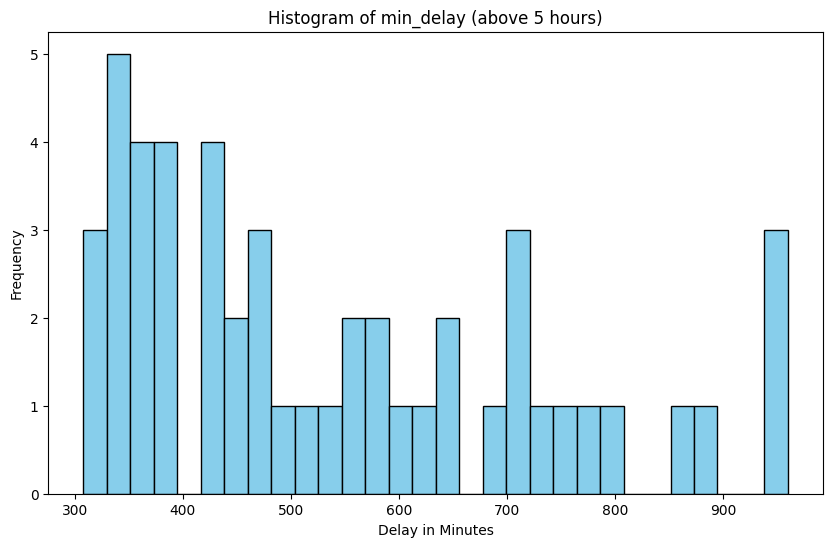

In [18]:
# Filter the DataFrame for min_delay values for various thresholds
df_delay_above_300 = df[(df['min_delay'] >= 301)]

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_delay_above_300['min_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of min_delay (above 5 hours)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Create a new DataFrame with min_delay values of 61 minutes or more - for later studies
df_delay_over_1hr = df[df['min_delay'] >= 61]

# Display the new DataFrame
df_delay_over_1hr.head()



,incident_date,line,incident_time,day_of_week,location,incident,min_delay,min_gap,bound,vehicle,holidayType,seasonType,lineId,lineName,delayType,delay_category
42,2023-01-02,509,23:49,Monday,SPADINA AND QUEENS QUA,Operations,80,90,W,4461,None,Winter 2023,509,Harbourfront,3,>= 61 minutes
88,2023-01-04,505,22:19,Wednesday,BROADVIEW AND DANFORTH,Diversion,150,160,N,4405,None,Winter 2023,505,Dundas,3,>= 61 minutes
92,2023-01-04,504,22:34,Wednesday,BROADVIEW AND DANFORTH,Diversion,150,160,S,4592,None,Winter 2023,504,King,3,>= 61 minutes
110,2023-01-05,501,22:28,Thursday,QUEEN AND PORTLAND,Diversion,102,112,W,4498,None,Winter 2023,501,Queen,3,>= 61 minutes
133,2023-01-06,512,20:04,Friday,ST CLAIR AND AVENUE,Held By,103,112,W,4488,None,Winter 2023,512,St. Clair,3,>= 61 minutes


### *Note:*

**Exploratory Data Analysis (EDA):** 

- After exploring several 'number of classes' (between 2 to 6 classes) and 'delay buckets' (varying between 10 minutes and 20 minutes), and fitting a Random Forest Classifier on them:

- The optimal number of classes is 3, and the optimal 'delay buckets' are as follows:
  - Short delay (5 minutes or less)
  - Normal delay (between 6 and 15 minutes)
  - Long delay (16 minutes or more)

- This has been reflected accordingly in the "createLINETable.py" script, and consequently, the "streetcardelaydb2.db" database.

**Measurement Error and Recall Bias:**

- As observed in the EDA.ipynb file, there is likely significant recall bias in the data collection process, where it seems that data collectors/reporters estimated delay minutes rather than using a system/algorithm to 'start' and 'stop' the clock counts when a delay event occurs.
- For example, there are large volumes of exactly 5-minute, 10-minute, and 15-minute delays, with a notable drop in volumes for the minutes in between.
- We could verify this assumption with the TTC.
- If this is the case, it is also highly likely that many significantly long delays—up (to 15 hours) — may be due to recall bias rather than actual 'start' and 'stop' clock counts, exacerbating measurement error and reducing data quality.


**Approach:**

- Due to the recall bias and measurement error mentioned, using regression would most likely result in a poor fit, as it tries to accurately predict numbers from data that were likely roughly estimated.
- We will select a classification model and choose an ensemble bagging method for this problem — in particular, the Random Forest Classifier.




---
---